In [1]:
#Customer Segmentation in Python

In [2]:
#Part I: Cohort Analysis

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
online = pd.read_excel("Online Retail.xlsx")

In [5]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [7]:
online['InvoiceMonth']= online['InvoiceDate'].apply(get_month)

In [8]:
#Group by CustomerID and selects InvoiceMonth for further calculations
grouping=online.groupby('CustomerID')['InvoiceMonth']

In [9]:
###Create a CohortMonth column by selecting the minimum InvoiceDay value###

In [10]:
online['CohortMonth']=grouping.transform('min')

In [11]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [12]:
def get_in_day(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [13]:
invoice_year,invoice_month,invoice_day = get_in_day(online,'InvoiceDate')
cohort_year,cohort_month,cohort_day = get_in_day(online,'CohortMonth')

In [14]:
###Calculate the difference between invoice date and cohort day (first transaction day)###

In [15]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

In [16]:
#Extract the difference in month, store as Cohort Index

In [17]:

online['CohortIndex']=(((years_diff * 365 + months_diff * 30 + days_diff)/30)+1).round(0)

In [18]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [19]:
online['Recency']=(years_diff * 365 + months_diff * 30 + days_diff)+1

In [20]:
###Calculate average price per cohort group###

In [21]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
cohort_data.head(10)

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1.0,10.127851
1,2010-12-01,2.0,15.204788
2,2010-12-01,3.0,14.423117
3,2010-12-01,4.0,14.151034
4,2010-12-01,5.0,14.581313
5,2010-12-01,6.0,13.066908
6,2010-12-01,7.0,15.618525
7,2010-12-01,8.0,14.411138
8,2010-12-01,9.0,16.250434
9,2010-12-01,10.0,15.689551


In [22]:
average_quantity = cohort_data.pivot(index ='CohortMonth',columns = 'CohortIndex',values='Quantity')

In [23]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [24]:
average_quantity

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,10.127851,15.204788,14.423117,14.151034,14.581313,13.066908,15.618525,14.411138,16.250434,15.689551,18.075615,15.520400,12.799138
2011-01-01,12.497692,9.496338,11.315283,11.565781,9.965101,16.575750,11.587781,13.180868,14.292736,10.942630,9.372314,8.542456,NaN
2011-02-01,10.546023,11.821513,12.746163,15.672619,10.239029,12.319160,13.628217,12.098888,13.399534,10.700404,10.653529,NaN,NaN
2011-03-01,9.624375,9.517073,11.395349,11.874402,9.990130,13.584367,13.306782,11.599251,12.415738,9.712153,NaN,NaN,NaN
2011-04-01,10.483557,8.870040,9.136425,10.392174,12.408925,10.294730,7.968584,9.635484,8.730088,NaN,NaN,NaN,NaN
2011-05-01,11.234576,9.911333,13.272506,12.559921,10.939036,9.787767,8.899540,9.096135,NaN,NaN,NaN,NaN,NaN
2011-06-01,9.400368,11.765592,12.111479,13.641447,12.105195,9.710503,9.501048,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.112500,9.775792,8.845465,7.318621,7.665810,5.756952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.832152,9.056258,4.913910,6.078890,5.930556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
retention

#why retention is larger than 1? 


CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.455324,0.433293,0.390453,0.441860,0.418605,0.447980,0.400245,0.406365,0.422277,0.444308,0.520196,0.575275
2011-01-01,1.0,1.650273,0.502732,0.699454,0.661202,0.743169,0.562842,0.617486,0.639344,0.770492,0.792350,0.737705,NaN
2011-02-01,1.0,1.176166,0.507772,0.471503,0.518135,0.497409,0.523316,0.507772,0.512953,0.632124,0.430052,NaN,NaN
2011-03-01,1.0,1.377451,0.455882,0.539216,0.426471,0.446078,0.460784,0.524510,0.627451,0.490196,NaN,NaN,NaN
2011-04-01,1.0,0.760204,0.403061,0.301020,0.306122,0.311224,0.352041,0.408163,0.295918,NaN,NaN,NaN,NaN
2011-05-01,1.0,1.107383,0.335570,0.308725,0.335570,0.516779,0.422819,0.483221,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,1.062992,0.385827,0.370079,0.464567,0.551181,0.511811,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,1.344444,0.411111,0.477778,0.477778,0.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,1.265060,0.421687,0.602410,0.409639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt

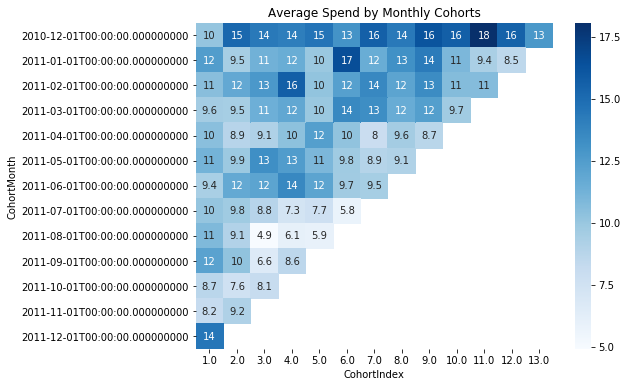

In [27]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()

In [28]:
#Part II - RFM Analysis
#Segment customers based on recency, frequency and monetary value

In [29]:
#Creat a spend quartile with 4 groups

In [30]:
grouping2 = online.groupby(['CustomerID'])
spend = grouping2['UnitPrice'].sum()
spend=spend.reset_index()

In [31]:
# Create a spend quartile with 4 groups - a range between 1 and 5.
#use pd.qcut(data_series, q=n, labels=x)
spend_quartile = pd.qcut(spend['UnitPrice'],q=4,labels=range(1,5))

In [32]:
# Assign the quartile values to the Spend_Quartile column in data
spend['Spend_Quartile']= spend_quartile

In [33]:
spend.groupby('Spend_Quartile').agg({'UnitPrice':['mean','max','min']})

UnitPrice                  
                      mean       max     min
Spend_Quartile                              
1                25.808179     52.73    0.00
2                87.635528    130.04   52.91
3               202.764621    302.11  130.15
4               971.824575  41376.33  303.00

In [34]:
spend.head()

,CustomerID,UnitPrice,Spend_Quartile
0,12346.0,2.08,1
1,12347.0,481.21,4
2,12348.0,178.71,3
3,12349.0,605.10,4
4,12350.0,65.30,2


In [35]:
#Create a Recency deciles

In [36]:
#create a dataset with minimum recency for each customer
min_recency = online.groupby('CustomerID')['Recency'].min()
min_recency = min_recency.reset_index()

In [37]:
#Store labels from 4 to 1 in a decreasing order because recency days the less the better
r_labels = list(range(4,0,-1))

In [38]:
# Create a recency quartile with 4 groups and pass the previously created labels 

In [39]:
recency_quartiles = pd.qcut(min_recency['Recency'],q=4,labels = r_labels)

In [40]:
min_recency['Recency_Quartiles']=recency_quartiles

In [41]:
min_recency.head()

,CustomerID,Recency,Recency_Quartiles
0,12346.0,18.0,2
1,12347.0,7.0,4
2,12348.0,16.0,2
3,12349.0,21.0,2
4,12350.0,2.0,4


In [42]:
###Calculating RFM Metrics###

In [43]:
#First need the most recent 12 months of data

In [44]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,1.0


In [45]:
from datetime import datetime, timedelta

In [46]:
stopdate = max(online['InvoiceDate'])-timedelta(days=364)

In [47]:
test = online[online['InvoiceDate']>stopdate]

In [48]:
print('Min:{}; Max:{}'.format(min(test.InvoiceDate),max(test.InvoiceDate)))

Min:2010-12-10 12:56:00; Max:2011-12-09 12:50:00


In [49]:
snapshot_date = max(test.InvoiceDate)

In [50]:
#Calculate Recency (the most recent payment date), Frequency, and Monetary Vluae

In [51]:
datamart = test.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x: (snapshot_date - x.max()).days+1,
    'InvoiceNo':'count',
    'UnitPrice':'sum'
})


In [52]:
datamart.rename(columns = {'InvoiceDate':'Recency',
                          'InvoiceNo':'Frequency',
                          'UnitPrice':'MonetaryValue'},inplace=True)

datamart = datamart[~(datamart == 0).any(axis=1)]

In [53]:
datamart.describe()

,Recency,Frequency,MonetaryValue
count,4292.000000,4292.000000,4292.000000
mean,86.955732,91.131407,316.418829
std,94.322245,226.630294,1279.787420
min,1.000000,1.000000,0.170000
25%,17.000000,17.000000,51.757500
50%,47.000000,41.000000,127.890000
75%,134.000000,99.000000,297.220000
max,364.000000,7793.000000,41376.330000


In [54]:
#Build RFM segments, will calculate quartile value for each column and name R,F,M

In [55]:
r_labels = range(4,0,-1)     #recency ranking is reversed
r_quartiles = pd.qcut(datamart['Recency'],4,labels = r_labels)
datamart['R']=r_quartiles

In [56]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'],4,labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'],4,labels = m_labels)
datamart['F']=f_quartiles
datamart['M']=m_quartiles

In [57]:
datamart.sort_values(by=['R','F','M'],ascending = False)

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12383.0,185,100,309.360,1,4,4
12501.0,315,160,387.320,1,4,4
12669.0,151,102,2524.180,1,4,4
12916.0,139,109,450.150,1,4,4
13093.0,267,157,516.160,1,4,4
13659.0,197,108,411.230,1,4,4
13952.0,211,138,546.541,1,4,4
14016.0,154,162,648.630,1,4,4
14245.0,176,112,348.950,1,4,4


In [58]:
###Concatenate RFM quartlie values to RFM_Segment###

In [59]:
datamart['RFM_Score']=datamart[['R','F','M']].sum(axis=1)

In [60]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment']=datamart.apply(join_rfm,axis = 1)

In [61]:
#In this step, we abitrarily assign groups based on RFM score

In [62]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)


In [63]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  	# Return the size of each segment
    'MonetaryValue': ['mean','count' ]
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         174.6      13.2          41.4  1265
Middle       72.7      47.4         182.6  1748
Top          19.7     227.9         771.3  1279


In [64]:
datamart.Recency.describe()

count    4292.000000
mean       86.955732
std        94.322245
min         1.000000
25%        17.000000
50%        47.000000
75%       134.000000
max       364.000000
Name: Recency, dtype: float64

In [65]:
###Part III Clustering Analysis###

In [66]:
#Step 1: Exploting Distribution

In [67]:
import seaborn as sns
from matplotlib import pyplot as plt

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


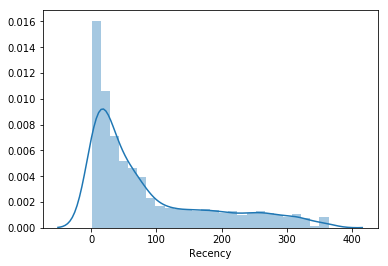

In [68]:
sns.distplot(datamart['Recency'])
plt.show()
#Recency is right skewed

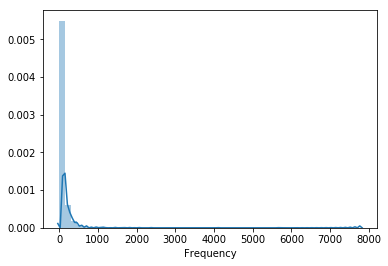

In [69]:
sns.distplot(datamart['Frequency'])
plt.show()

In [70]:
import numpy as np

datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]

#take log of raw dataset
datamart_log = np.log(datamart_rfm)

In [71]:
#Standardize manually
"""
# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

"""

'\n# Scale the data by dividing each entry by standard deviation\ndata_scaled = data / data.std()\n\n# Normalize the data by applying both centering and scaling\ndata_normalized = (data - data.mean()) / data.std()\n\n# Print summary statistics to make sure average is zero and standard deviation is one\nprint(data_normalized.describe().round(2))\n\n'

In [77]:
datamart_rfm.head()
datamart_log.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.786897,0.693147,0.732368
12347.0,0.693147,5.017280,5.970292
12348.0,4.317488,3.433987,5.185764
12349.0,2.944439,4.290459,6.405394
12350.0,5.736572,2.833213,4.178992


In [72]:
#Standardize using sklearn 

In [73]:
"""
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

"""

'\n# Initialize a scaler\nscaler = StandardScaler()\n\n# Fit the scaler\nscaler.fit(data)\n\n# Scale and center the data\ndata_normalized = scaler.transform(data)\n\n# Create a pandas DataFrame\ndata_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)\n\n'

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)
datamart_normalized = pd.DataFrame(data=datamart_normalized, index = datamart_log.index, columns = datamart_log.columns)

In [75]:
datamart_normalized.describe()

,Recency,Frequency,MonetaryValue
count,4.292000e+03,4.292000e+03,4.292000e+03
mean,-2.203438e-16,2.586597e-16,1.854780e-16
std,1.000117e+00,1.000117e+00,1.000117e+00
min,-2.550729e+00,-2.762174e+00,-4.664630e+00
25%,-5.935265e-01,-6.317550e-01,-5.910485e-01
50%,1.089783e-01,3.022584e-02,5.334256e-02
75%,8.327308e-01,6.931008e-01,6.540671e-01
max,1.523063e+00,3.975986e+00,4.170212e+00


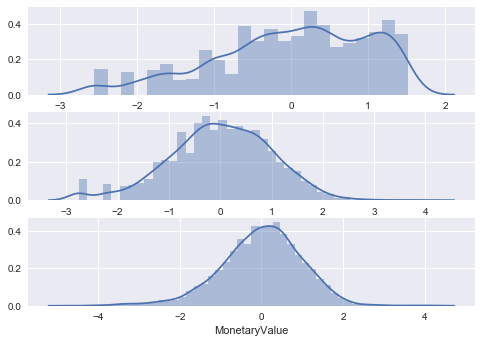

In [246]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

In [ ]:
"""
subplot(nrows, ncols, index, **kwargs)
subplot(pos, **kwargs)
subplot(ax)
"""

In [204]:
"""
# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])

"""

"# Create a subplot of the distribution of var2_log\nplt.subplot(2, 1, 1); sns.distplot(data['var2_log'])\n\n# Create a subplot of the distribution of var3_log\nplt.subplot(2, 1, 2); sns.distplot(data['var3_log'])"

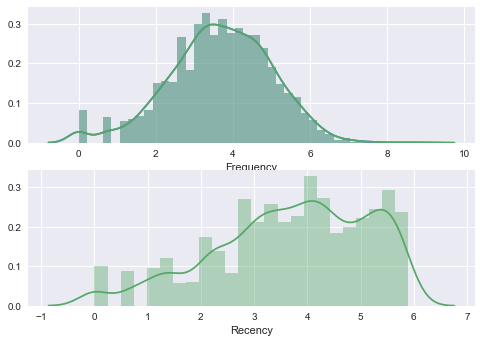

In [217]:
plt.subplot(2,1,1);sns.distplot(frequency_log)
plt.subplot(2,1,2);sns.distplot(recency_log)
plt.show()

In [ ]:
###Part 4: Practical implementation of k-means clustering###

In [80]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
'''

 Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    
    
    # Assign sum of squared distances to k element of dictionary
    #Sum of squared distances of samples to their closest cluster center.
    sse[k] = kmeans.inertia_
    
    
    # Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


'''


'\n\n Initialize KMeans with k clusters\n    kmeans = KMeans(n_clusters=k, random_state=1)\n    \n    # Fit KMeans on the normalized dataset\n    kmeans.fit(data_normalized)\n    \n    \n    # Assign sum of squared distances to k element of dictionary\n    #Sum of squared distances of samples to their closest cluster center.\n    sse[k] = kmeans.inertia_\n    \n    \n    # Add the plot title "The Elbow Method"\nplt.title(\'The Elbow Method\')\n\n# Add X-axis label "k"\nplt.xlabel(\'k\')\n\n# Add Y-axis label "SSE"\nplt.ylabel(\'SSE\')\n\n# Plot SSE values for each key in the dictionary\nsns.pointplot(x=list(sse.keys()), y=list(sse.values()))\nplt.show()\n\n\n'

In [83]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

In [84]:
#Create a dataframe by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)

#Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

#Calculate average RFM values and segments sizes per cluster value
grouped.agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['count','mean']
}).round(1)

Recency Frequency MonetaryValue       
           mean      mean         count   mean
Cluster                                       
0          16.0     214.9          1351  731.1
1         149.0       8.9           988   26.5
2         104.7      47.1          1953  176.2